## Traitement du signal


# 1. Marche et rythmicité dans la maladie de Parkinson

## A/ Chargement des données

###  Importation des bibliothèques ou modules

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image

### Chargement des données 

In [11]:
matdata = sio.loadmat('gait.mat')

### B/ Représentation graphique des données 

** Extraire les données du fichier `gait.mat`**

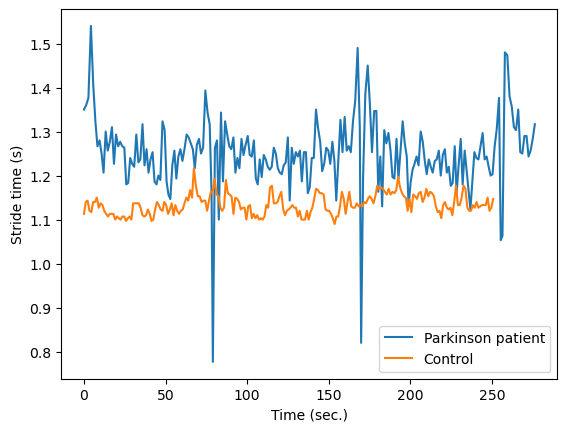

In [14]:
park = matdata['park']
cont = matdata['cont'] 

plt.subplot2grid((1,1),(0,0)) 
plt.plot(park[:,0],park[:,1],label='Parkinson patient')
plt.plot(cont[:,0],cont[:,1],label='Control')
plt.xlabel('Time (sec.)')
plt.ylabel('Stride time (s)')
plt.legend()

### C/ Création d’une série temporelle (ou ‘time series’)

** Créer le signal chronologique dit ‘time series’**

In [17]:
# define sampling rate
srate = 1000

# create time series of steps 
parkts = np.zeros(int(park[-1,0]*1000)) 
for i in range(0,len(park)): 
 parkts[int(park[i,0]*1000-1)] = 1

# time vector and number of time points
parktx = np.arange(0,len(parkts))/srate 
parkn = len(parktx)

# repeat for control data 
contts = np.zeros(int(cont[-1,0]*1000)) 
for i in range(0,len(cont)): 
 contts[int(cont[i,0]*1000-1)] = 1

# time vector and number of time points 
conttx = np.arange(0,len(contts))/srate 
contn = len(conttx)


** Affichage du déroulement temporel des étapes**

(0.0, 1.5)

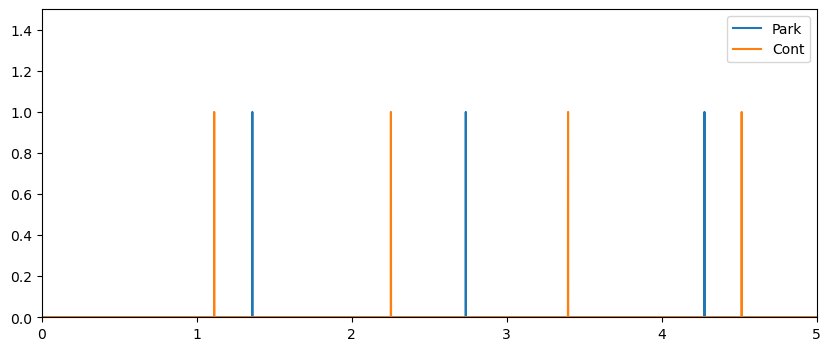

In [19]:
# plot the time course of steps 
plt.figure(figsize=(10,4)) 
plt.plot(parktx,parkts,label='Park')# should be a stemplot, but that's really slow to render 
plt.plot(conttx,contts,label='Cont')
plt.legend()
plt.xlim((0,5))
plt.ylim((0,1.5))


### D/ Transformée de Fourier

In [21]:
# compute power for both datasets
parkPow = 2*np.abs(scipy.fftpack.fft(parkts)/parkn)
contPow = 2*np.abs(scipy.fftpack.fft(contts)/contn)

# compute separate frequencies vector for each subject
parkHz = np.linspace(0,srate/2,int(np.floor(parkn/2)+1))
contHz = np.linspace(0,srate/2,int(np.floor(contn/2)+1))

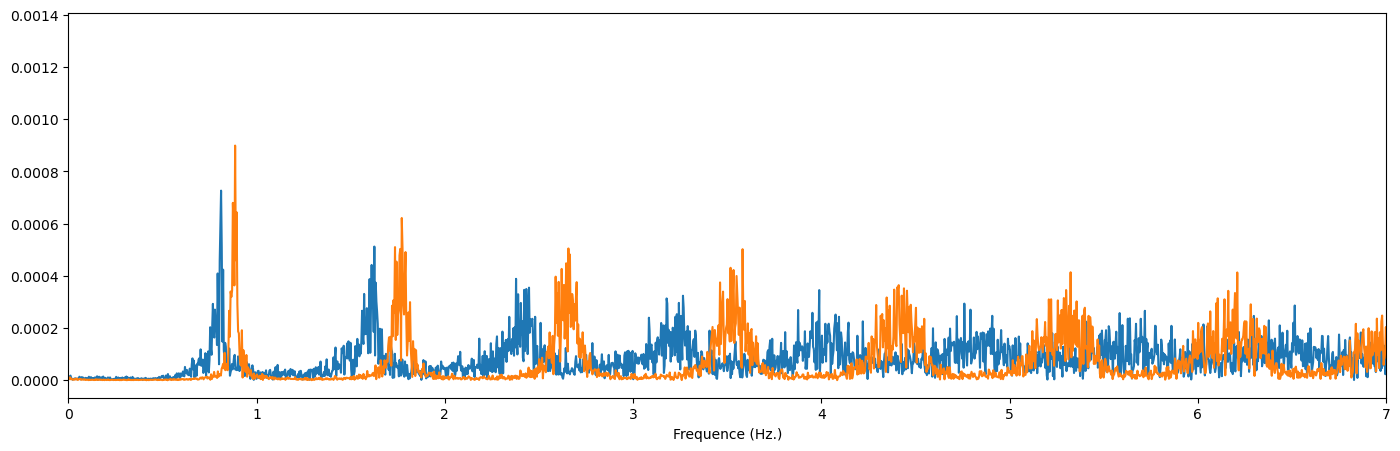

In [22]:
# show power spectra
plt.figure(figsize=(17,5)) 
plt.plot(parkHz[1:],parkPow[1:len(parkHz)]) 
plt.plot(contHz[1:],contPow[1:len(contHz)]) 
plt.xlim([0,7]) 
plt.xlabel('Frequence (Hz.)')
plt.show()

## 2. Rythmicité dans les ondes cérébrales

### B/  Création d'une série temporelle (ou'time series')

In [25]:
# extract data from mat file 
matdata = sio.loadmat('EEGrestingState.mat')
eegdata = matdata['eegdata']
eegdata = eegdata[0]
srate = matdata['srate'] 
srate = srate[0]
n = len(eegdata) 
timevec = np.arange(n)/srate

### C/ Tranformée de Fourier 

In [27]:
# compute amplitude spectrum 
dataX = scipy.fftpack.fft(eegdata)/n 
ampspect = 2*abs(dataX) 
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

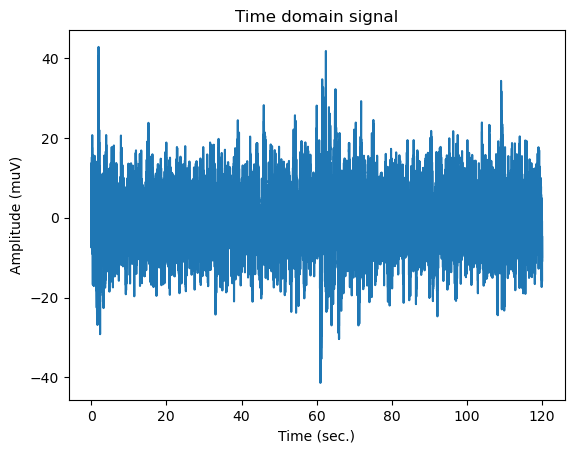

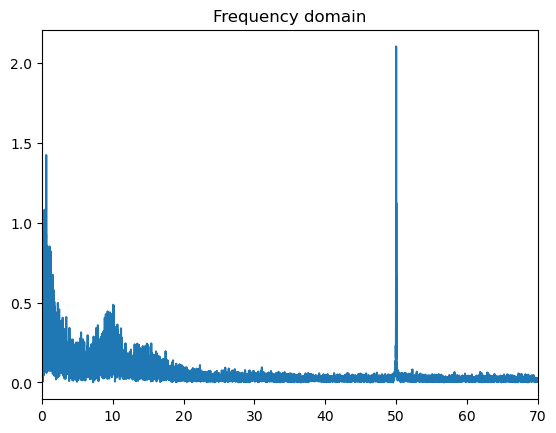

In [28]:
plt.plot(timevec,eegdata) 
plt.xlabel('Time (sec.)') 
plt.ylabel('Amplitude (muV)') 
plt.title('Time domain signal') 
plt.show() 

plt.plot(hz,ampspect[0:int(np.floor(n/2)+1)]) 
plt.xlim([0,70]) 
plt.title('Frequency domain') 
plt.show()